#Decision Trees

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. 

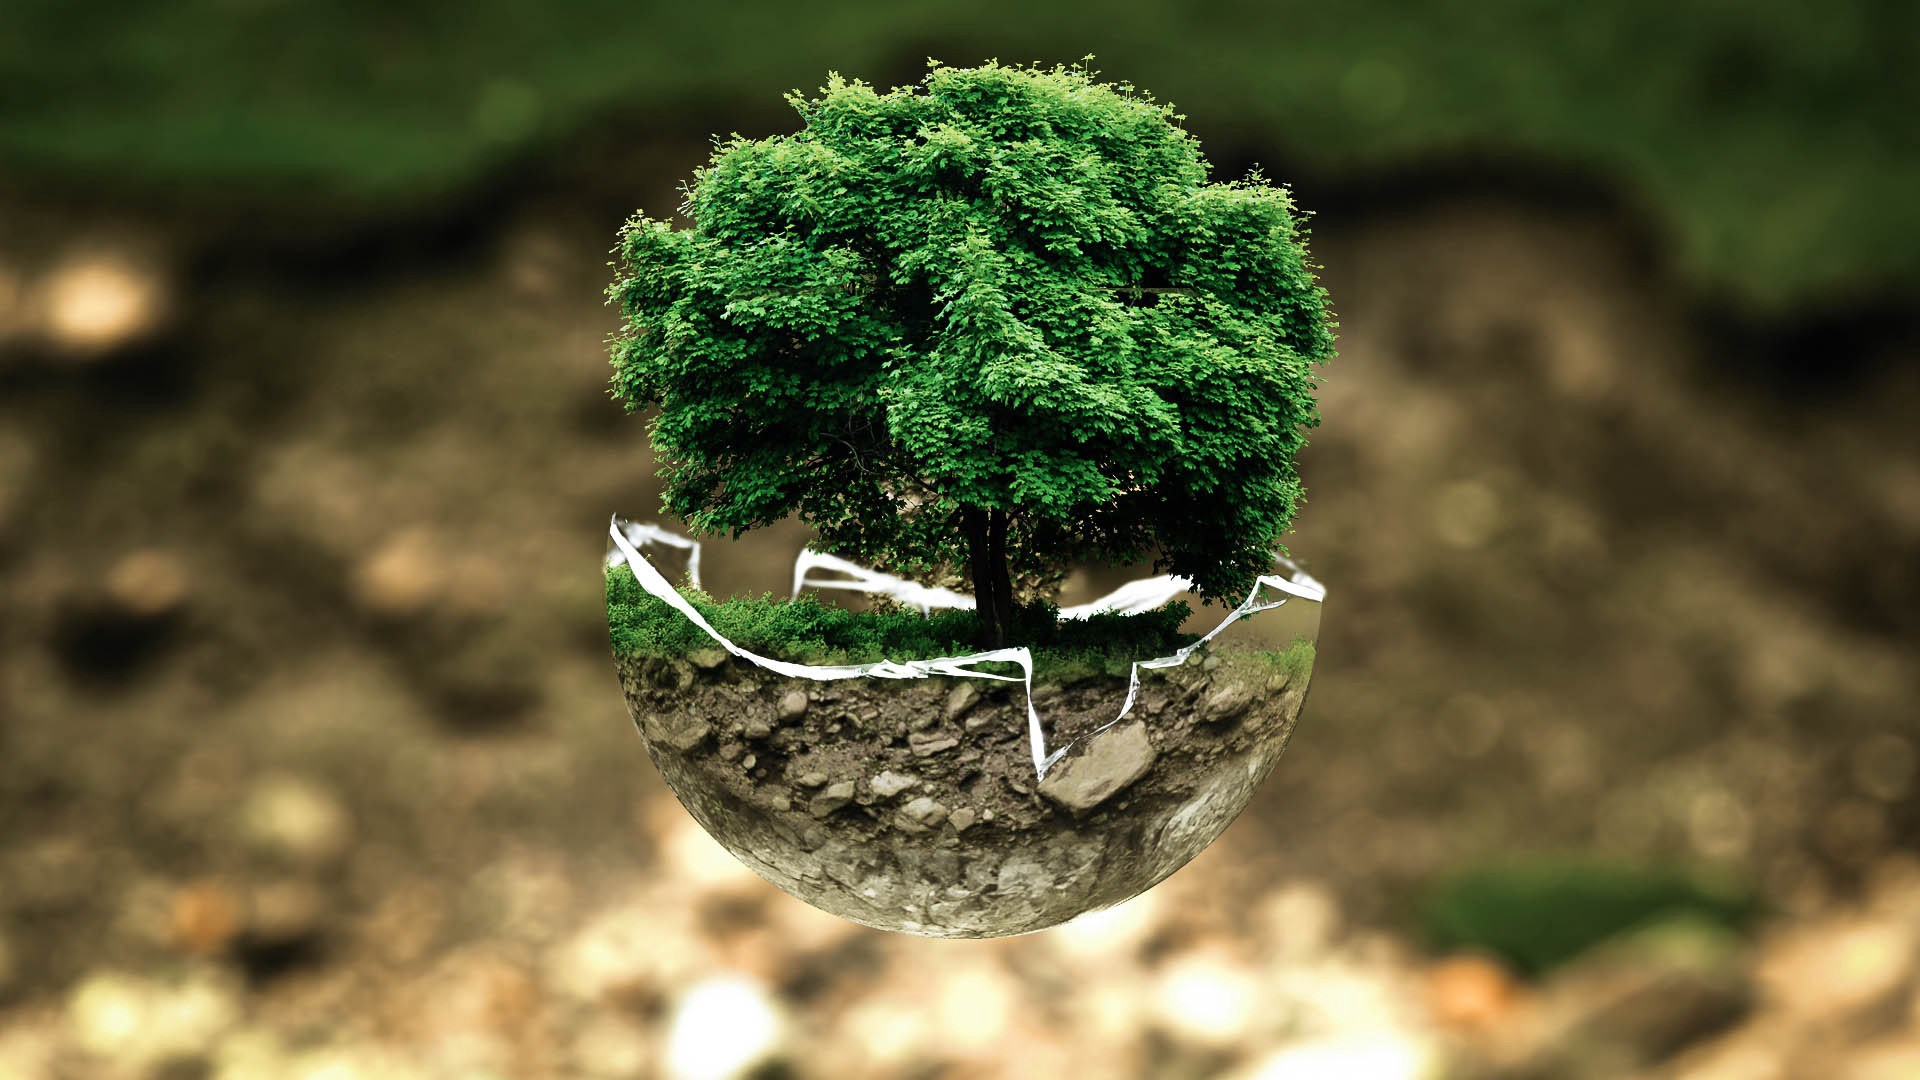

A decision tree is drawn upside down with its root at the top. In the image below , the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.

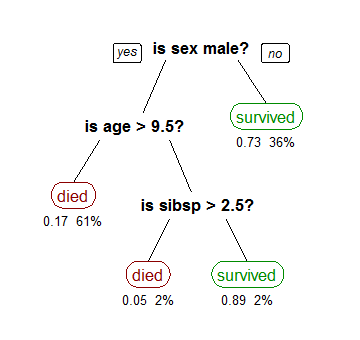

##The Decision Tree Algoritm
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). The algorithm uses **entropy** to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one.

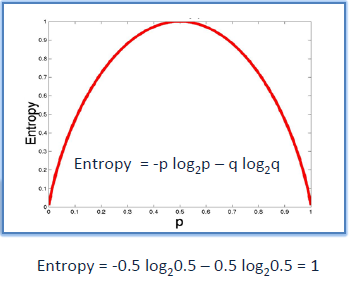

**Choosing to split the tree depends on the information gain.**


Information Gain: 

The information gain is based on the decrease in entropy after a data-set is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

You can find a good article about the the exact calculation [here](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

#Building a Decision tree model from SKLearn

Lets start by bringing in a simple dataset

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

###Load the dataset


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Turgibot/BigData/master/DataSets/kyphosis.csv')
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

Age = months

Start = starting vertebrae

Num = number of vertebrae

Kyphosis = 1 if present, 0 if absent

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.Kyphosis.replace({'absent':0, 'present':1}, inplace=True)

### EDA


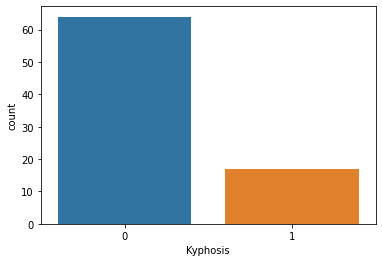

In [ ]:
sns.countplot(x='Kyphosis',data=df )

### missing values checking


In [ ]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

##The Decision Tree model



#Scale the dataset if necessary 

Not neccessary

###Define x-input features and y - output 



In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

###Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

###Import the DecisionTreeClassifier object and train the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#we can prune the tree by specifing the max depth
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=6)


In [ ]:
#train
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###display the Tree graphically

Scikit learn actually has some built-in visualization capabilities for decision trees.

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



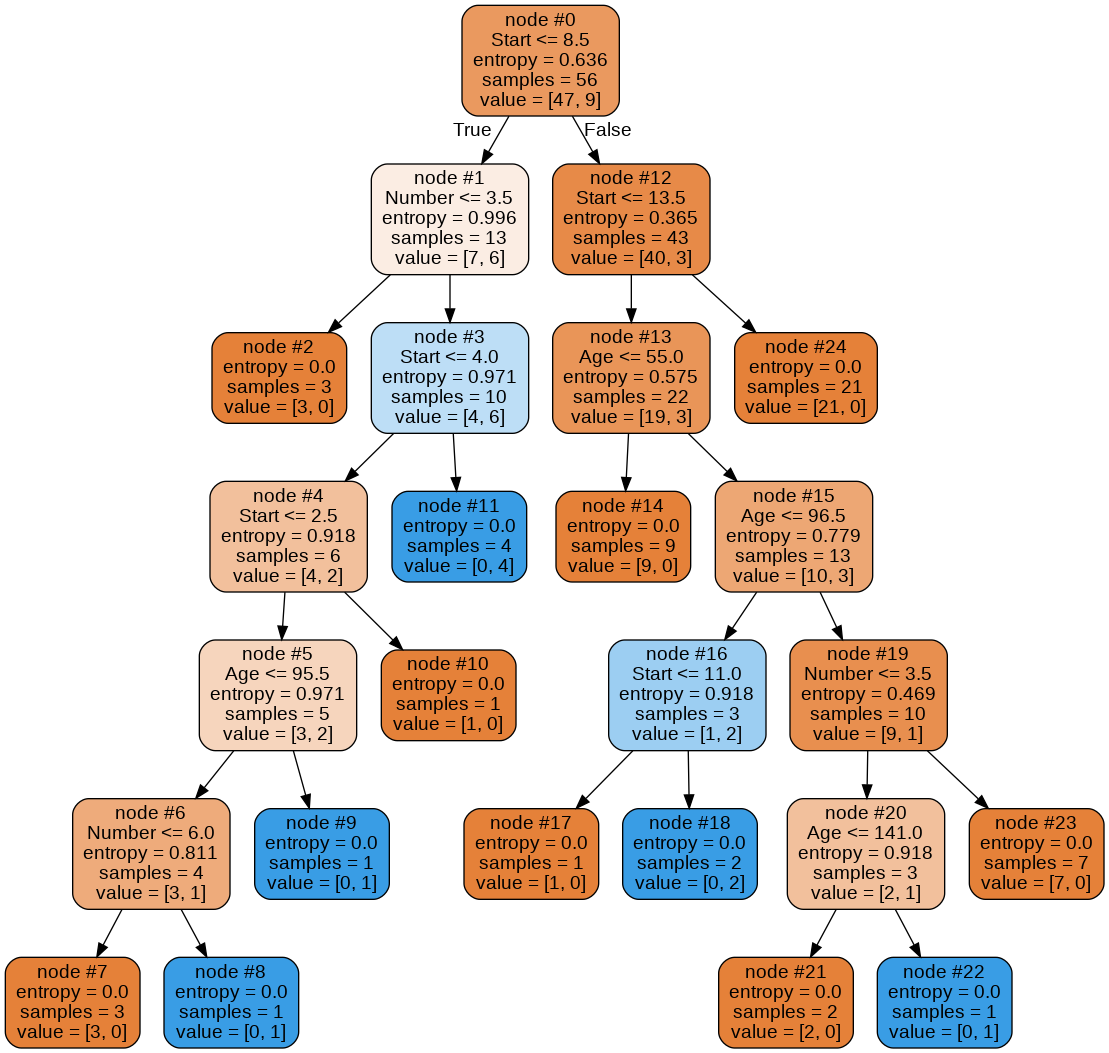

In [ ]:
features = list(df.columns[1:])
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, node_ids=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

### feature importances 

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. 

The higher the value the more important the feature.


In [ ]:
print(dtree.feature_importances_)

[0.26845898 0.23626812 0.4952729 ]


In [ ]:
fig = go.Figure()
trace = go.Bar(
    x = dtree.feature_importances_,
    y = features,
    orientation='h'
)
fig.add_trace(trace)

##Prediction and Evaluation

In [ ]:
y_pred = dtree.predict(X_test)
y_pred = pd.DataFrame(y_pred ,columns=['y_pred'])
y_pred.head()


y_pred
0       0
1       0
2       0
3       1
4       0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 4  4]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.50      0.67         8

    accuracy                           0.84        25
   macro avg       0.90      0.75      0.78        25
weighted avg       0.87      0.84      0.82        25



#Random Forest


#Ensemble of trees
Rather than just relying on one Decision Tree and hoping we made the right decision at each split, Ensemble Methods allow us to take a sample of Decision Trees into account, calculate which features to use or questions to ask at each split, and make a final predictor based on the aggregated results of the sampled Decision Trees.

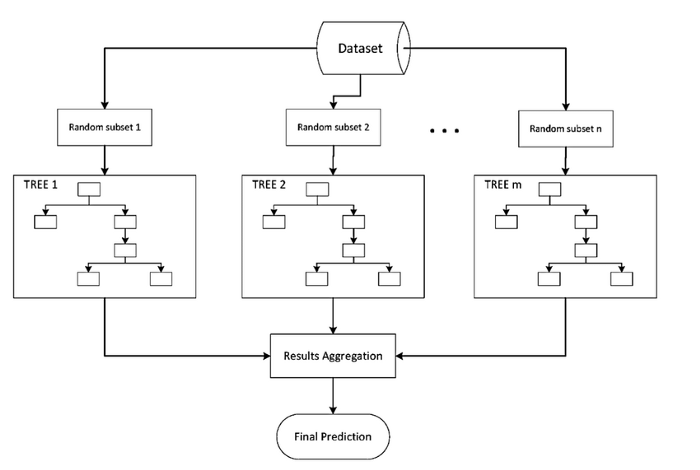

##Creating the Random Forest model classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')

###Train the model

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###Testing the model
Let's predict off the y_test values and evaluate our model.

In [ ]:
y_predict = rfc.predict(X_test)

###Evaluation

In [ ]:
print(confusion_matrix(y_test,y_predict))
print('----------------------------------------------------------')
print(classification_report(y_test,y_predict))

[[17  0]
 [ 7  1]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       1.00      0.12      0.22         8

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25



In [ ]:
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
auc_scores

array([0.92857143, 0.57142857, 1.        , 0.71428571, 0.75      ,
       0.91666667, 0.83333333, 0.95833333, 0.875     , 0.625     ])

In [ ]:
accuracy_scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
accuracy_scores

array([0.77777778, 0.875     , 1.        , 0.875     , 0.5       ,
       0.875     , 0.625     , 0.875     , 0.875     , 0.875     ])

In [ ]:
print('Mean values')
print('auc:', auc_scores.mean())
print('accuracy: ', accuracy_scores.mean())


Mean values
auc: 0.8172619047619047
accuracy:  0.8152777777777779
